# Natural Language Processing on IMDB Dataset

## Loading necessary Libraries

In [20]:
# libraries
import numpy as np 
import pandas as pd

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv("C:\\Users\\NILKANTHA BAG\\Downloads\\SENTIMENT ANALYSIS\data.txt", delimiter='\t', header=None)
df.columns = ["Review_text"]

In [22]:
df

,Review_text
0,"A very, very, very slow-moving, aimless movie ..."
1,Not sure who was more lost - the flat characte...
2,Attempting artiness with black & white and cle...
3,Very little music or anything to speak of. ...
4,The best scene in the movie was when Gerardo i...
...,...
743,I just got bored watching Jessice Lange take h...
744,"Unfortunately, any virtue in this film's produ..."
745,"In a word, it is embarrassing. 0"
746,Exceptionally bad! 0


# Reading the File and Understanding the Data

In [23]:
import re

def split_it(Review_text):
    return re.findall('(\s[0|1])', Review_text)

df['Sentiment'] = df['Review_text'].apply(split_it)


In [24]:
df

,Review_text,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",[ 0]
1,Not sure who was more lost - the flat characte...,[ 0]
2,Attempting artiness with black & white and cle...,[ 0]
3,Very little music or anything to speak of. ...,[ 0]
4,The best scene in the movie was when Gerardo i...,[ 1]
...,...,...
743,I just got bored watching Jessice Lange take h...,[ 0]
744,"Unfortunately, any virtue in this film's produ...",[ 0]
745,"In a word, it is embarrassing. 0",[ 0]
746,Exceptionally bad! 0,[ 0]


In [25]:
df['Sentiment'] = [''.join(map(str, l)) for l in df['Sentiment']]
df

,Review_text,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of. ...,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing. 0",0
746,Exceptionally bad! 0,0


In [26]:
update_df = df.drop([19,20,25,76,135,136,149,155,158,217,236,245,260,285,288,324,325,344,358,362,418,434,454,489,584,615,627,646,721])
 
update_df

,Review_text,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of. ...,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing. 0",0
746,Exceptionally bad! 0,0


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

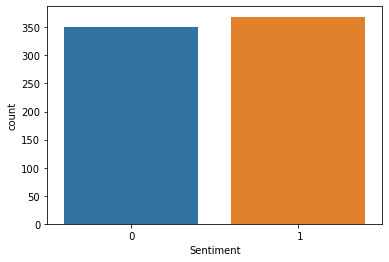

In [27]:
import seaborn as sns
sns.countplot(x='Sentiment', data=update_df)

In [28]:
update_df.to_csv("sentiment.csv")

In [29]:
df=pd.read_csv("sentiment.csv")

In [30]:
df.head()

,Unnamed: 0,Review_text,Sentiment
0,0,"A very, very, very slow-moving, aimless movie ...",0
1,1,Not sure who was more lost - the flat characte...,0
2,2,Attempting artiness with black & white and cle...,0
3,3,Very little music or anything to speak of. ...,0
4,4,The best scene in the movie was when Gerardo i...,1


In [31]:
df.shape

(719, 3)

In [32]:
df['Review_text'].isnull().sum()

0

In [33]:
Sentiment1 = df[df.Sentiment == 1]
print(Sentiment1.shape)

(369, 3)


# Data Cleaning and Preparation

## Converting the Text to Lower Case

In [34]:
Sentiment1['Review_text']= Sentiment1['Review_text'].str.lower()
Sentiment1['Review_text'].head()

4     the best scene in the movie was when gerardo i...
7     saw the movie today and thought it was a good ...
9     loved the casting of jimmy buffet as the scien...
10        and those baby owls were adorable.          1
11    the movie showed a lot of florida at it's best...
Name: Review_text, dtype: object

## Splitting and Removing Punctuation from the Text

In [35]:
all_sentiment = Sentiment1['Review_text'].str.split(' ')
all_sentiment.head()

4     [the, best, scene, in, the, movie, was, when, ...
7     [saw, the, movie, today, and, thought, it, was...
9     [loved, the, casting, of, jimmy, buffet, as, t...
10    [and, those, baby, owls, were, adorable., , , ...
11    [the, movie, showed, a, lot, of, florida, at, ...
Name: Review_text, dtype: object

## Joining the Entire Review

In [38]:
import string
all_sentiment_cleaned = []

for text in all_sentiment:
    text = [x.strip(string.punctuation) for x in text]
    all_sentiment_cleaned.append(text)

all_sentiment_cleaned[0]

text_sentiment = [" ".join(text) for text in all_sentiment_cleaned]
final_text_sentiment = " ".join(text_sentiment)
final_text_sentiment[:500]

"the best scene in the movie was when gerardo is trying to find a song that keeps running through his head          1 saw the movie today and thought it was a good effort good messages for kids          1 loved the casting of jimmy buffet as the science teacher          1 and those baby owls were adorable          1 the movie showed a lot of florida at it's best made it look very appealing          1 the songs were the best and the muppets were so hilarious          1 it was so cool          1 th"

# WORDCLOUD 

In [39]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

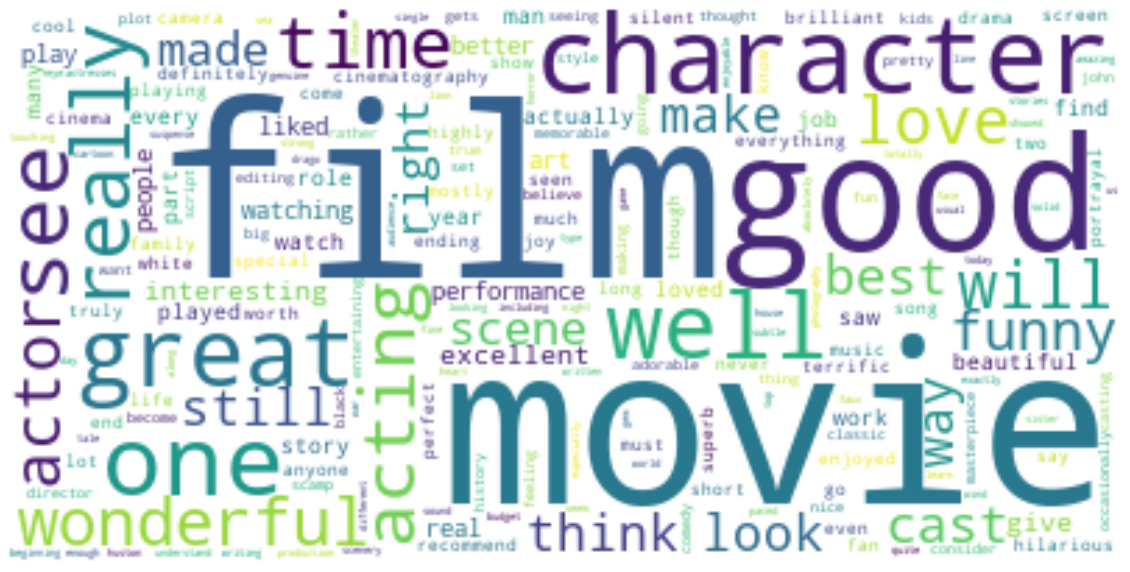

In [40]:
import matplotlib.pyplot as plt
wordcloud_sentiment = WordCloud(background_color="white").generate(final_text_sentiment)

plt.figure(figsize = (20,20))
plt.imshow(wordcloud_sentiment, interpolation='bilinear')
plt.axis("off")
plt.show()

### The word cloud displayed above is good, but some of the words are larger than the others. This is because the size of the word in the word cloud is proportional to the frequency of the word inside the corpus.

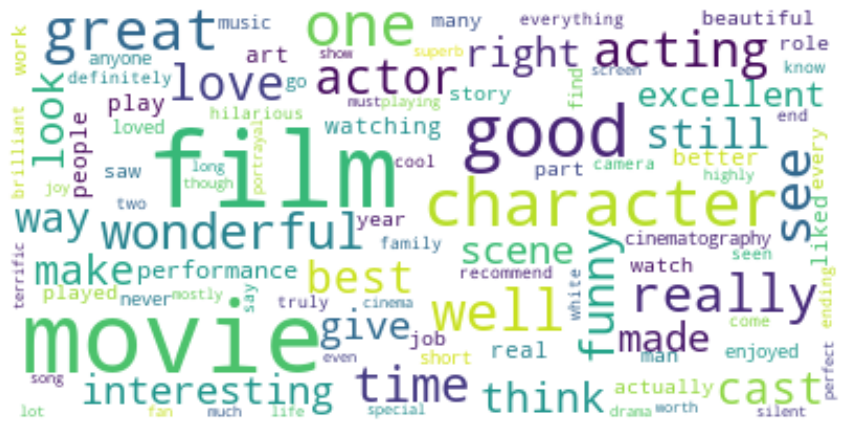

In [41]:
stopwords = set(STOPWORDS)
stopwords.update(["subject","re","vince","kaminski","enron","cc", "will", "s", "1","e","t"])

wordcloud_sentiment = WordCloud(stopwords=stopwords, background_color="white", max_font_size=50, max_words=100).generate(final_text_sentiment)


plt.figure(figsize = (15,15))
plt.imshow(wordcloud_sentiment, interpolation='bilinear')
plt.axis("off")
plt.show()

### From the above image, we can see that the stop words are not displayed.

### we will extract the most frequent thirty words prints the top thirty words along with its count as output.

In [42]:
import collections
filtered_words_sentiment = [word for word in final_text_sentiment.split() if word not in stopwords]
counted_words_sentiment = collections.Counter(filtered_words_sentiment)

word_count_sentiment = {}

for letter, count in counted_words_sentiment.most_common(30):
    word_count_sentiment[letter] = count
    
for i,j in word_count_sentiment.items():
        print('Word: {0}, count: {1}'.format(i,j))

Word: film, count: 71
Word: movie, count: 64
Word: good, count: 32
Word: one, count: 26
Word: great, count: 22
Word: see, count: 19
Word: well, count: 18
Word: characters, count: 17
Word: really, count: 17
Word: acting, count: 15
Word: wonderful, count: 15
Word: love, count: 14
Word: time, count: 13
Word: best, count: 12
Word: funny, count: 12
Word: cast, count: 12
Word: think, count: 11
Word: still, count: 11
Word: movies, count: 11
Word: character, count: 11
Word: made, count: 10
Word: look, count: 10
Word: right, count: 10
Word: interesting, count: 10
Word: films, count: 9
Word: way, count: 9
Word: watching, count: 9
Word: better, count: 9
Word: real, count: 9
Word: liked, count: 9


In [43]:
import collections
filtered_words_sentiment = [word for word in final_text_sentiment.split() if word not in stopwords]
counted_words_sentiment = collections.Counter(filtered_words_sentiment)

word_count_sentiment = {}

for letter, count in counted_words_sentiment.most_common(30):
    word_count_sentiment[letter] = count
    
for i,j in word_count_sentiment.items():
        print('Word: {0}, count: {1}'.format(i,j))

Word: film, count: 71
Word: movie, count: 64
Word: good, count: 32
Word: one, count: 26
Word: great, count: 22
Word: see, count: 19
Word: well, count: 18
Word: characters, count: 17
Word: really, count: 17
Word: acting, count: 15
Word: wonderful, count: 15
Word: love, count: 14
Word: time, count: 13
Word: best, count: 12
Word: funny, count: 12
Word: cast, count: 12
Word: think, count: 11
Word: still, count: 11
Word: movies, count: 11
Word: character, count: 11
Word: made, count: 10
Word: look, count: 10
Word: right, count: 10
Word: interesting, count: 10
Word: films, count: 9
Word: way, count: 9
Word: watching, count: 9
Word: better, count: 9
Word: real, count: 9
Word: liked, count: 9


# Data Preprocessing

 **Our data exploration ends here. The next step will be preprocess the data in order to make the learning process more smooth.**

Preprocessing steps:
- Removing special characters
- Convert sentence into lower case
- Remove Stop Words
- Stemming or Lemmatization
    

In [44]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')

In [45]:
# # We can also use Lemmatizer instead of Stemmer

lemmatizer = WordNetLemmatizer()

In [46]:
# initializing the lists

clean_tweet_lst = []

tweet_len_lst = []

In [47]:
def preprocess(raw_tweet, flag):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    #Stemming/Lemmatization
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_tweet_lst.append(" ".join(words))
    
    tweet_len_lst.append(len(words))

Stemming makes sure that different variations of a word, say ‘warm’, warmer’, ‘warming’ and ‘warmed,’ are represented by a single token - ‘warm’, because they all represent the same information (represented by the 'stem' of the word).

In [ ]:
!pip install tqdm

In [48]:
from tqdm import tqdm, tqdm_notebook

tqdm.pandas()

In [49]:
from nltk.stem.porter import *

stemmer = PorterStemmer()

In [50]:
clean_tweet_lst = []

tweet_len_lst = []

update_df['Review_text'].progress_apply(lambda x: preprocess(x, 'stem'))

update_df['clean_tweet_stem'] = clean_tweet_lst
update_df['tweet_length_stem'] = tweet_len_lst

100%|███████████████████████████████████████████████████████████████████████████████| 719/719 [00:03<00:00, 186.93it/s]


In [51]:
update_df.head()

,Review_text,Sentiment,clean_tweet_stem,tweet_length_stem
0,"A very, very, very slow-moving, aimless movie ...",0,slow move aimless movi distress drift young man,8
1,Not sure who was more lost - the flat characte...,0,sure lost flat charact audienc nearli half walk,8
2,Attempting artiness with black & white and cle...,0,attempt arti black white clever camera angl mo...,19
3,Very little music or anything to speak of. ...,0,littl music anyth speak,4
4,The best scene in the movie was when Gerardo i...,1,best scene movi gerardo tri find song keep run...,10


In [52]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\NILKANTHA
[nltk_data]     BAG\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [53]:
clean_tweet_lst = []

tweet_len_lst = []

update_df['Review_text'].progress_apply(lambda x: preprocess(x, 'lemma'))

update_df['clean_tweet_lema'] = clean_tweet_lst

update_df['tweet_length_lema'] = tweet_len_lst

100%|███████████████████████████████████████████████████████████████████████████████| 719/719 [00:04<00:00, 144.68it/s]


In [54]:
update_df.head()

,Review_text,Sentiment,clean_tweet_stem,tweet_length_stem,clean_tweet_lema,tweet_length_lema
0,"A very, very, very slow-moving, aimless movie ...",0,slow move aimless movi distress drift young man,8,slow moving aimless movie distressed drifting ...,8
1,Not sure who was more lost - the flat characte...,0,sure lost flat charact audienc nearli half walk,8,sure lost flat character audience nearly half ...,8
2,Attempting artiness with black & white and cle...,0,attempt arti black white clever camera angl mo...,19,attempting artiness black white clever camera ...,19
3,Very little music or anything to speak of. ...,0,littl music anyth speak,4,little music anything speak,4
4,The best scene in the movie was when Gerardo i...,1,best scene movi gerardo tri find song keep run...,10,best scene movie gerardo trying find song keep...,10


## 4. Data Preparation 

Let's now prepare the data and build the model.

In [75]:
update_df['Sentiment'].value_counts()

 1    369
 0    350
Name: Sentiment, dtype: int64

In [57]:
# splitting into test and train

from sklearn.model_selection  import train_test_split

train, test = train_test_split(update_df,test_size=0.2,random_state=42)

In [58]:
train_clean_tweet=[]
for tweet in train['clean_tweet_stem']:
    train_clean_tweet.append(tweet)

test_clean_tweet=[]
for tweet in test['clean_tweet_stem']:
    test_clean_tweet.append(tweet)

# Word Counts with CountVectorizer
**Text to numerical vector using Bag of Words**

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,2))

train_features = vectorizer.fit_transform(train_clean_tweet)

test_features = vectorizer.transform(test_clean_tweet)

In [60]:
vectorizer.vocabulary_

{'show': 4255,
 'exactli': 1524,
 'govern': 2074,
 'scientist': 4086,
 'argu': 245,
 'human': 2288,
 'reason': 3852,
 'gadget': 1914,
 'show exactli': 4257,
 'exactli govern': 1525,
 'govern scientist': 2075,
 'scientist argu': 4087,
 'argu human': 246,
 'human reason': 2291,
 'reason gadget': 3853,
 'great': 2082,
 'film': 1696,
 'director': 1176,
 'great film': 2088,
 'film great': 1726,
 'great director': 2086,
 'howev': 2277,
 'decent': 1078,
 'act': 25,
 'action': 55,
 'locat': 2751,
 'work': 5320,
 'balanc': 361,
 'thing': 4720,
 'howev decent': 2278,
 'decent act': 1079,
 'act action': 28,
 'action locat': 56,
 'locat work': 2752,
 'work balanc': 5322,
 'balanc thing': 364,
 'foreign': 1835,
 'worth': 5351,
 'one': 3339,
 'second': 4132,
 'time': 4787,
 'foreign worth': 1837,
 'worth one': 5353,
 'one second': 3365,
 'second time': 4135,
 'meredith': 2968,
 'better': 443,
 'right': 3953,
 'meredith better': 2969,
 'better right': 453,
 'true': 4899,
 'classic': 777,
 'true class

In [61]:
print("Total unique words:", len(vectorizer.vocabulary_))

print("Type of train_features:", type(train_features))

print("Shape of input data", train_features.shape)

Total unique words: 5428
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (575, 5428)


## 5. Model Building and Evaluation


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [63]:
Classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200)
]

In [64]:
for classifier in Classifiers:
    model = classifier.fit(train_features,train['Sentiment'])
    pred = model.predict(test_features)
    accuracy = accuracy_score(pred,test['Sentiment'])
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))    

Accuracy of LogisticRegression is 0.8333333333333334
Accuracy of DecisionTreeClassifier is 0.7361111111111112
Accuracy of RandomForestClassifier is 0.7361111111111112


# Saving the Model and Vectorizer in Pickle

In [65]:
model = LogisticRegression()

model.fit(train_features,train['Sentiment'])

LogisticRegression()

In [66]:
from pickle import dump

dump(vectorizer, open('pickle/countvectorizer.pkl', 'wb'))

dump(model, open('pickle/logit_model.pkl', 'wb'))

# Prediction on Future Data Points

In [67]:
from pickle import load

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [69]:
def preprocess(raw_tweet):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    clean_sent = " ".join(words)
    
    return clean_sent

In [70]:
def predict(tweet):
    
    # Loading pretrained CountVectorizer from pickle file
    vectorizer = load(open('pickle/countvectorizer.pkl', 'rb'))
    
    # Loading pretrained logistic classifier from pickle file
    classifier = load(open('pickle/logit_model.pkl', 'rb'))
    
    # Preprocessing the tweet
    clean_tweet = preprocess(tweet)
    
    # Converting text to numerical vector
    clean_tweet_encoded = vectorizer.transform([clean_tweet])
    
    # Prediction
    prediction = classifier.predict(clean_tweet_encoded)
    
    return prediction

In [71]:
tweet = input("Enter a tweet to check its sentiment: ")

prediction = predict(tweet)

print(prediction)
if(prediction ==[' 1']):
    print("Positive Sentiment")
else:
    print("Negative Sentiment")

Enter a tweet to check its sentiment: bad
[' 0']
Negative Sentiment


# CONCLUSION-
## Both Regex and NLTK play a vital role in the text pre-processing phase.
## word cloud for the entire text can  be used for decision making or as features for model building.